Assignment 2

Fajri Sofianto

Link Data : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

Guna menghitung statistik dari data tersebut


In [21]:
import math
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from scipy.stats import uniform

from datetime import datetime

class color:      # untuk warna teks penjelasan grafik
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Borough 1 : Manhattan, Borough 2 : Bronx, Borough 3 : Brooklyn, Borough 4 : Queens, Borough 5 : Staten Island

In [2]:
df = pd.read_csv('D:\File_Analisa_Python/nycrollingsales.csv')      #insert file from local drive


## Change anomaly values
df['SALE PRICE'] = df['SALE PRICE'].replace(' -  ',0).astype(float) #replace - (dash) to zero and convert it to float

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])                   #convert SALE DATE to Datetime

df = df.rename(columns={'Unnamed: 0': 'KEY'})                       #rename column Unnamed 0 to KEY

df['YEAR BUILT'] = df['YEAR BUILT'].replace(0,1900)
df['YEAR BUILT'] = df['YEAR BUILT'].replace(1111,1900)              #change year built from 0 to 1900 and 1111 to 1900

df['EASE-MENT'] = df['EASE-MENT'].replace(' ','-')                  #fill column Ease-ment with - (dash)

df.describe()

,KEY,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1945.965227,1.657485,1.056623e+06
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,35.537798,0.819341,1.038794e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1680.000000,1.000000,0.000000e+00
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,4.150000e+05
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


Membaca data borough yang paling laku secara jumlah properti


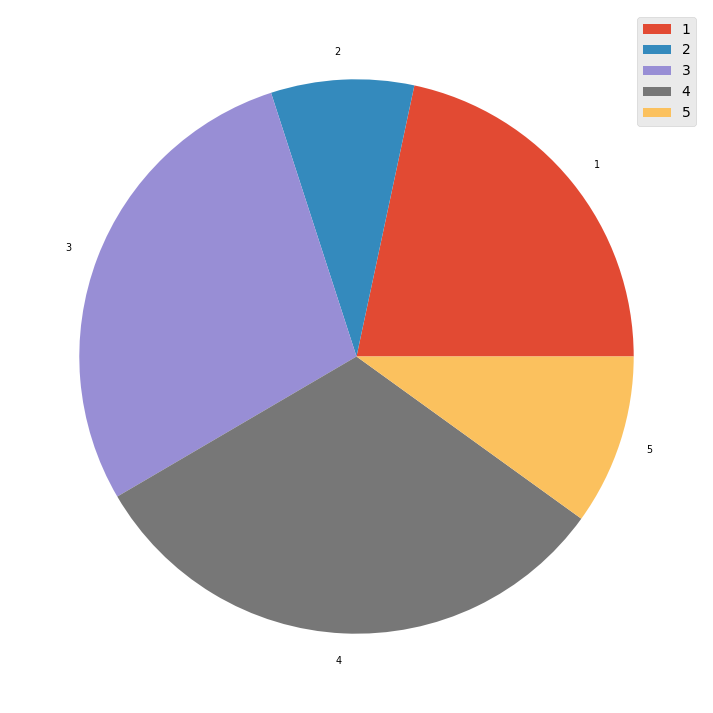

Berdasarkan Jumlah Property yang terjual/pindah tangan, Borough 4 (Queens) merupakan borough yang paling banyak


In [42]:
df_count = df.groupby('BOROUGH').count()                                    #Menentukan Data Borough yang akan dianalisa berdasarkan jumlah properti yang terjual &
df_count = df_count.reset_index()
df_count = df_count[['BOROUGH', 'KEY']].rename(columns={'KEY':'COUNT'})


print('''Membaca data borough yang paling laku secara jumlah properti''')

df_count.set_index('BOROUGH').plot.pie(y='COUNT', figsize = (9,9), fontsize= 7)
plt.legend()
plt.ylabel('')
plt.show()
print('''Berdasarkan Jumlah Property yang terjual/pindah tangan, Borough 4 (Queens) merupakan borough yang paling banyak''')

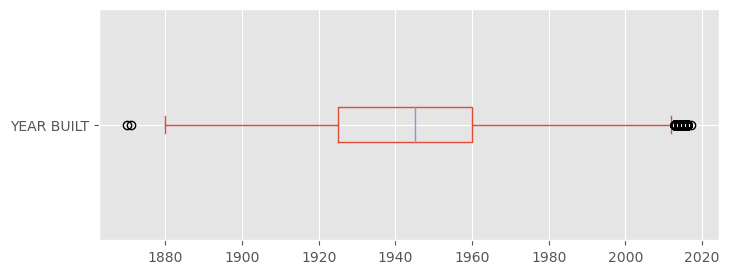

Rata - rata properti Queens dibangun tahun 1947.42
Nilai tengah 1945.0
Nilai Modus 1920
Outliers terlihat tidak terlalu banyak

ModeResult(mode=array([1920], dtype=int64), count=array([1717]))


In [4]:
borough4 = df[(df['BOROUGH'] == 4 ) & (df['SALE PRICE'] != 0)]                  #filter borough 4 dan harga != 0 (bukan balik nama)

plt.style.use('ggplot')
borough4['YEAR BUILT'].plot(kind='box', vert=False, figsize=(8,3))
plt.show()

mean_year = borough4['YEAR BUILT'].mean()                        #Menghitung Rata - rata
median_year = borough4['YEAR BUILT'].median()                    #Menghitung Nilai tengah
mode_year = statistics.mode(borough4['YEAR BUILT'])              #Menghitung Modus
hmean_year = statistics.harmonic_mean(borough4['YEAR BUILT'])    #Menghitung Harmonic Mean
max_year = borough4['YEAR BUILT'].max()                          #Menghitung Nilai Maksimal
min_year = borough4['YEAR BUILT'].min()                          #Menghitung Nilai Minimal
modus_year = scipy.stats.mode(borough4['YEAR BUILT'], axis=None, keepdims=True)  #Menghitung Nilai Modus menggunakan Scipy

print('Rata - rata properti Queens dibangun tahun',round(mean_year,2))
print('Nilai tengah',median_year)
print('Nilai Modus',mode_year)
print('Outliers terlihat tidak terlalu banyak')
print('')
print(modus_year)

In [5]:
print(color.GREEN+'kesimpulan dari data diatas didapat bahwa tahun pembuatan properti di NYC dengan rata - rata',round(mean_year),'''sedangkan nilai tengah dari
tahun pembuatan''',round(median_year),'''dan frekuensi terbanyak properti dibangun tahun''',mode_year,'dengan jumlah 1717 kali'+color.END)

kesimpulan dari data diatas didapat bahwa tahun pembuatan properti di NYC dengan rata - rata 1947 sedangkan nilai tengah dari
tahun pembuatan 1945 dan frekuensi terbanyak properti dibangun tahun 1920 dengan jumlah 1717 kali


In [6]:
build_max = borough4['YEAR BUILT'].max()
build_min = borough4['YEAR BUILT'].min()

df_year = borough4[['YEAR BUILT']]

range = build_max - build_min                   #periksa rentang waktu property dibangun
var = borough4['YEAR BUILT'].var(ddof=0)              #periksa variance populasi
stdeviation = borough4['YEAR BUILT'].std(ddof=0)      #periksa standar deviasi populasi
skew = borough4['YEAR BUILT'].skew()
kurt = borough4['YEAR BUILT'].kurtosis()


print('Rentang waktu bangunan didirikan pada Queens yaitu',range,'tahun', 'dimana bangunan paling tua didirikan dari tahun', build_min, 'dan bangunan yg paling muda di tahun', build_max )
print('Varian tahun properti didirikan di NYC sebesar',round(var,2))
print('Dengan nilai standar deviasi sebesar',round(stdeviation,2))
print('Nilai Skewness =',round(skew,2),'(positif) artinya data tersebut banyak properti yang didirikan di tahun muda sehingga membentuk distribusi positif')
print('Nilai Kurtosis =',round(kurt,2),'(positif) dimana nilai kurtosis positif yaitu distribusi runcing dan data lebih banyak di bagian ekor')
print(color.GREEN+'========================================================================'+color.END)
print('25% data property Quantile2 dibangun dibawah tahun',borough4['YEAR BUILT'].quantile(0.25))
print('50% data property Quantile3 dibangun di tahun',borough4['YEAR BUILT'].quantile(0.5))
print('25% data property Quantile4 dibangun di tahun',borough4['YEAR BUILT'].quantile(0.75))


Rentang waktu bangunan didirikan pada Queens yaitu 147 tahun dimana bangunan paling tua didirikan dari tahun 1870 dan bangunan yg paling muda di tahun 2017
Varian tahun properti didirikan di NYC sebesar 833.4
Dengan nilai standar deviasi sebesar 28.87
Nilai Skewness = 0.78 (positif) artinya data tersebut banyak properti yang didirikan di tahun muda sehingga membentuk distribusi positif
Nilai Kurtosis = 0.22 (positif) dimana nilai kurtosis positif yaitu distribusi runcing dan data lebih banyak di bagian ekor
25% data property Quantile2 dibangun dibawah tahun 1925.0
50% data property Quantile3 dibangun di tahun 1945.0
25% data property Quantile4 dibangun di tahun 1960.0


In [7]:
cor_year_price = borough4['YEAR BUILT'].corr(borough4['SALE PRICE'])            #mencari korelasi

print(color.GREEN+'Nilai korelasi R hampir mendekati 0 (',cor_year_price,') yang dapat diartikan bahwa tidak ada hubungannya antara tahun didirikan bangunan pada Queens dengan Harga penjualannya'+color.END)

Nilai korelasi R hampir mendekati 0 ( 0.0032641678174891533 ) yang dapat diartikan bahwa tidak ada hubungannya antara tahun didirikan bangunan pada Queens dengan Harga penjualannya


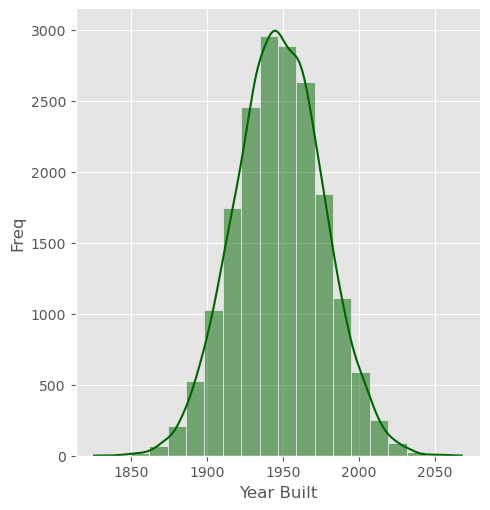

Properti di Queens terdistribusi normal dalam segi tahun dibangunnya


In [8]:
data_norm = scipy.stats.norm.rvs(size= len(borough4['YEAR BUILT']), loc=mean_year, scale=stdeviation)

sns.displot(data_norm,
            kde=True,
            bins=20,
            color='darkgreen',
            alpha=0.5)
plt.ylabel('Freq')
plt.xlabel('Year Built')
plt.show()

print('Properti di Queens terdistribusi normal dalam segi tahun dibangunnya')

In [9]:
n = len(borough4['YEAR BUILT'])
x = borough4[borough4['YEAR BUILT'] > 1950]['YEAR BUILT'].count()
percentage_year = (x/len(borough4['YEAR BUILT'])*100)

print('CONFIDENCE INTERVAL')
print('')
print(color.RED+'Pertanyaan : Berapa persen property yang dibangun diatas tahun 1950 di Queens?'+color.END)
print(n,'total properti di Queens')
print(x,'total properti yang dibangun setelah tahun 1950 atau',round(percentage_year,2),'%')
print('')

data4 = borough4[borough4['YEAR BUILT'] > 1950]
be = data4['YEAR BUILT'].mean()
z = 1.96
std = data4['YEAR BUILT'].std() 
n = len(data4['YEAR BUILT'])
se = std / np.sqrt(n)
me = z * se

print(round(be - me), round(be + me))

print('')
print(color.GREEN+'38,9% properti di Queens dibangun direntang tahun 1974 - 1975'+color.END)

CONFIDENCE INTERVAL

Pertanyaan : Berapa persen property yang dibangun diatas tahun 1950 di Queens?
18441 total properti di Queens
7191 total properti yang dibangun setelah tahun 1950 atau 38.99 %

1975 1976

38,9% properti di Queens dibangun direntang tahun 1974 - 1975


In [41]:
print('HYPOTHESIS TESTING')
print('')
print('Hypothesis : 38,9% properti di Borough Queens dibangung di rentang tahun 1974 - 1975')
print('H1 = 38.9% di Queens tahun 1974 - 1975')
print('H0 = 38.9% di Queens bukan di tahun 1974 - 1975')
alpha = 0.05

df_h1 = borough4[(borough4['YEAR BUILT'] >= 1974 ) & (borough4['YEAR BUILT'] <= 1975)]['YEAR BUILT']
df_h0 = borough4[(borough4['YEAR BUILT'] <= 1974 ) | (borough4['YEAR BUILT'] >= 1975)]['YEAR BUILT']

print("rata2 properti Queens dibangun di tahun", df_h1.mean(), 'dari', len(df_h1), 'properti' )
print("rata2 properti Queens dibangun di tahun", df_h0.mean(), 'dari', len(df_h0), 'properti' )
print('')

zstat, pvalue = sm.stats.ztest(df_h1, df_h0, alternative="two-sided")
print(pvalue)
print('')

if (pvalue < alpha):
  print("REJECT null hypothesis H0")
else:
  print("FAIL to reject null hypothesis H0")

print('')
print('hipotesa H0 bisa direject, artinya properti di Queens dibangun diantara tahun 1974-1975')

HYPOTHESIS TESTING

Hypothesis : 38,9% properti di Borough Queens dibangung di rentang tahun 1974 - 1975
H1 = 38.9% di Queens tahun 1974 - 1975
H0 = 38.9% di Queens bukan di tahun 1974 - 1975
rata2 properti Queens dibangun di tahun 1974.844155844156 dari 77 properti
rata2 properti Queens dibangun di tahun 1947.4234043706958 dari 18441 properti

7.78915550965464e-17

REJECT null hypothesis H0

hipotesa H0 bisa direject, artinya properti di Queens dibangun diantara tahun 1974-1975


# Hasil Analisa

- Queens merupakan borough paling banyak laku dalam jumlah properti di NYC dengan jumlah penjualan properti sebanyak 26.736 dari total 84.548 properti di NYC dimana transaksi penjualan properti tersebut termasuk
dalam transaksi balik nama / waris (nominal 0 dolar)
- Properti di Queens rata - rata dibangun di tahun 1947 dengan frekuensi properti dibangun di tahun 1920 sebanyak 1.717 properti
- Bangunan paling tua di Queens didirikan di tahun 1870 dan bangunan yg paling muda di tahun 2017 dengan nilai deviasi sebesar 28,87 terdistribusi normal
- dengan rata - rata properti didirikan di tahun 1947, dapat dikatakan bahwa sebanyak 38,9% bangunan di Queens didirikan setelah tahun 1950